# <font color = 'brown'>Bike Sharing Assignment(Linear Regression)</font>

### Problem Statement :

A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state.

In such an attempt, BoomBikes aspires to understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-19. They have planned this to prepare themselves to cater to the people's needs once the situation gets better all around and stand out from other service providers and make huge profits.
They have contracted a consulting company to understand the factors on which the demand for these shared bikes depends. Specifically, they want to understand the factors affecting the demand for these shared bikes in the American market. The company wants to know:

- Which variables are significant in predicting the demand for shared bikes.
- How well those variables describe the bike demands

Based on various meteorological surveys and people's styles, the service provider firm has gathered a large dataset on daily bike demands across the American market based on some factors. 

### Business Goal :

You are required to model the demand for shared bikes with the available independent variables. It will be used by the management to understand how exactly the demands vary with different features. They can accordingly manipulate the business strategy to meet the demand levels and meet the customer's expectations. Further, the model will be a good way for management to understand the demand dynamics of a new market.

### Data Dictionary :

day.csv have the following fields:
	
- instant: record index
- dteday : date
- season : season (1:spring, 2:summer, 3:fall, 4:winter)
- yr : year (0: 2018, 1:2019)
- mnth : month ( 1 to 12)
- holiday : weather day is a holiday or not (extracted from http://dchr.dc.gov/page/holiday-schedule)
- weekday : day of the week
- workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
- weathersit : 
	- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
	- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
	- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
	- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
- temp : temperature in Celsius
- atemp: feeling temperature in Celsius
- hum: humidity
- windspeed: wind speed
- casual: count of casual users
- registered: count of registered users
- cnt: count of total rental bikes including both casual and registered

#### Import Required Libraries :

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

### Step 1 : Reading and Understanding the Data

In [2]:
# Load  and read the Data set

bike_data = pd.read_csv('day.csv')
bike_data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [3]:
# Number of rows and columns
bike_data.shape

(730, 16)

In [4]:
# Checking the columns and their Data types

bike_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [5]:
# Checking for the descriptive statistics

bike_data.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


## Step 2 : Exploratory Data Analysis

In [6]:
# Checking the null values in the Data set

bike_data.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

- We can clearly see that there is no missing/null values in the data set. Hence there is no need for any data imputation.

<b>Drop the unwanted columns:</b>

In [7]:
# Remove unwanted columns
bike_data.drop(['instant', 'dteday', 'casual', 'registered'], axis = 1, inplace = True)

<b>Inferences:</b>

After checking the data dictionary, it's fair to remove the below columns as they are not necessary for our analysis
- From the data set we can understand that the 'instant' column is just like an id for each entry, so we can drop it.
- We already have separate month and year column, so the 'dteday' column is also of no use to our analysis, so we can drop that column as well.
- Now we know that 'casual' and 'registered' together sum to 'cnt'. Since cnt is our target variable we can ignore casual and registered and delete these 2 columns

<b>Converting the numerical variables like season,yr,mnth,weekday,weathersit into categorical variables</b>

In [8]:
bike_data.columns

Index(['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'cnt'],
      dtype='object')

In [9]:
# Checking the value counts of the categorical variables

num_var = ['season', 'yr', 'mnth', 'weekday', 'weathersit']

for i in bike_data[num_var]:
    print('\n' + i)
    print('-'*30)
    print(bike_data[num_var][i].value_counts())


season
------------------------------
3    188
2    184
1    180
4    178
Name: season, dtype: int64

yr
------------------------------
1    365
0    365
Name: yr, dtype: int64

mnth
------------------------------
12    62
10    62
8     62
7     62
5     62
3     62
1     62
11    60
9     60
6     60
4     60
2     56
Name: mnth, dtype: int64

weekday
------------------------------
2    105
1    105
6    104
5    104
4    104
3    104
0    104
Name: weekday, dtype: int64

weathersit
------------------------------
1    463
2    246
3     21
Name: weathersit, dtype: int64


<b>From the above, we find out all the possible integer values which we need to map to categorical values as per the data dictionary</b>

In [10]:
bike_data['season'] = bike_data['season'].map({1:'spring', 2:'summer', 3:'fall', 4:'winter'})
bike_data['yr'] = bike_data['yr'].map({0:'2018', 1:'2019'})
bike_data['mnth'] = bike_data['mnth'].map({1:'Jan', 2:'Feb', 3:'Mar', 4:'Apr', 5:'May', 6:'June', 7:'July', 8:'Aug', 9:'Sep', 10:'Oct', 11:'Nov', 12:'Dec'})
bike_data['weekday'] = bike_data['weekday'].map({0:'Sun', 1:'Mon', 2:'Tue', 3:'Wed', 4:'Thu', 5:'Fri', 6:'Sat'})
bike_data['weathersit'] = bike_data['weathersit'].map({1:'Clear', 2:'Mist + Cloudy', 3:'Light Rain/Snow'})

In [11]:
bike_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   yr          730 non-null    object 
 2   mnth        730 non-null    object 
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    object 
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(3), object(5)
memory usage: 68.6+ KB


In [12]:
num_var = ['season', 'yr', 'mnth', 'weekday', 'weathersit']

for i in bike_data[num_var]:
    print('\n' + i)
    print('-'*30)
    print(bike_data[num_var][i].value_counts())


season
------------------------------
fall      188
summer    184
spring    180
winter    178
Name: season, dtype: int64

yr
------------------------------
2019    365
2018    365
Name: yr, dtype: int64

mnth
------------------------------
Mar     62
Jan     62
Dec     62
July    62
Oct     62
Aug     62
May     62
Sep     60
Apr     60
Nov     60
June    60
Feb     56
Name: mnth, dtype: int64

weekday
------------------------------
Mon    105
Tue    105
Thu    104
Fri    104
Wed    104
Sun    104
Sat    104
Name: weekday, dtype: int64

weathersit
------------------------------
Clear              463
Mist + Cloudy      246
Light Rain/Snow     21
Name: weathersit, dtype: int64


<b>Visualising the Numerical Variables :</b>

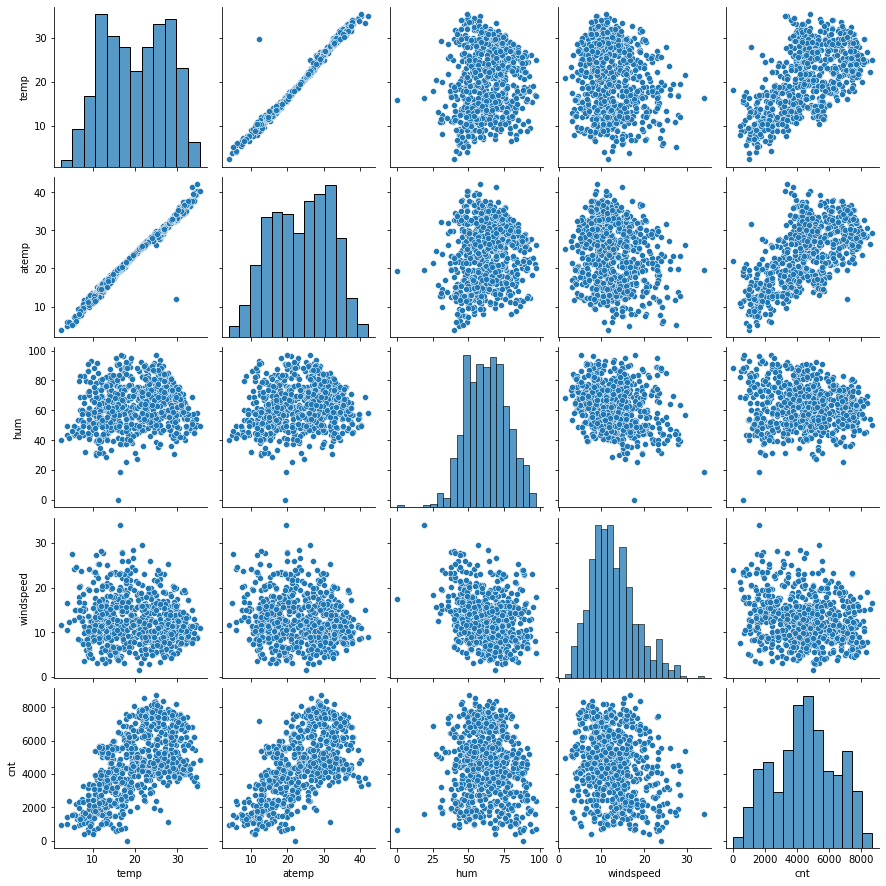

In [13]:
# Creating the pair plot using the numerical columns

sns.pairplot(bike_data, vars = ['temp', 'atemp', 'hum', 'windspeed', 'cnt'])
plt.show()

- From the above pair plot we can clearly conclude that 'temp' and 'atemp' seems have the positive correlation with 'cnt'.
- On the other hand 'hum' and 'windspeed' seems have the negative

<b>Visualising the categorical variable:</b>

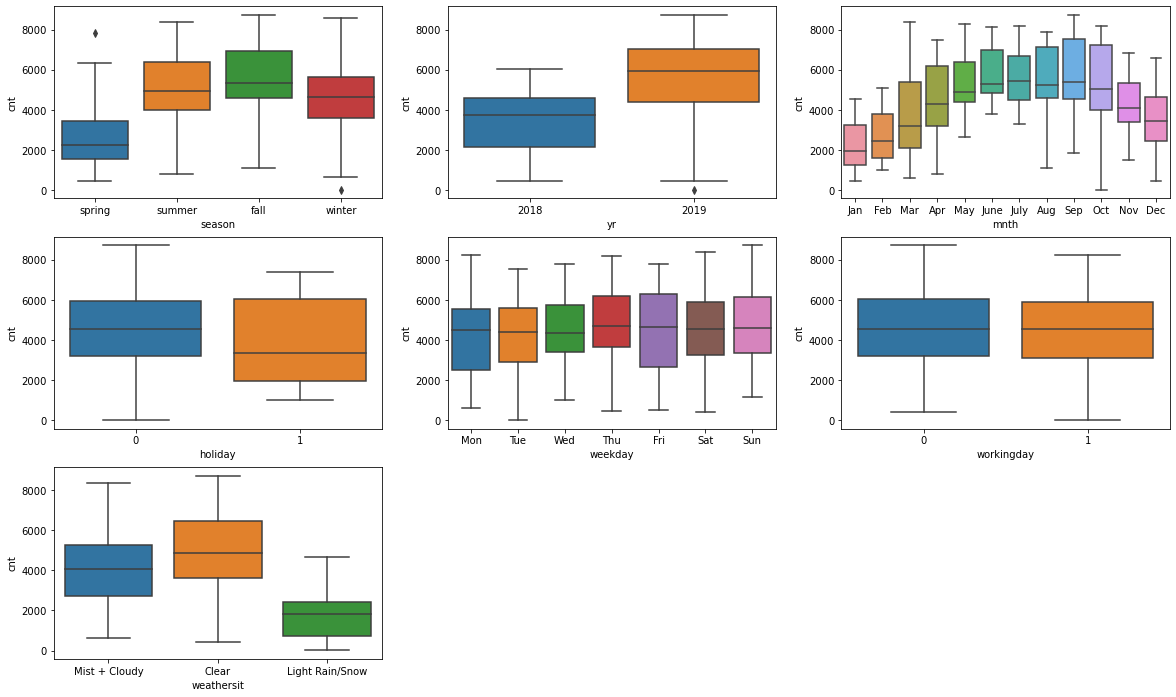

In [14]:
# Creating box plot for categorical variables
# Here we will use 'cnt' as target variable and all the categories as independent variable

plt.figure(figsize = (20,12))
plt.subplot(3,3,1)
sns.boxplot(x = 'season', y = 'cnt', data = bike_data)
plt.subplot(3,3,2)
sns.boxplot(x = 'yr', y = 'cnt', data = bike_data)
plt.subplot(3,3,3)
sns.boxplot(x = 'mnth', y = 'cnt', data = bike_data)
plt.subplot(3,3,4)
sns.boxplot(x = 'holiday', y = 'cnt', data = bike_data)
plt.subplot(3,3,5)
sns.boxplot(x = 'weekday', y = 'cnt', data = bike_data)
plt.subplot(3,3,6)
sns.boxplot(x = 'workingday', y = 'cnt', data = bike_data)
plt.subplot(3,3,7)
sns.boxplot(x = 'weathersit', y = 'cnt', data = bike_data)
plt.show()

<b>Inferences:</b>
- From the 'season' boxplot we can see that almost 5000 bookings are from the fall season compaired to other seasons
- From the 'yr' boxplot we can observe that the count of bike is increased in 2019.
- From the 'mnth' boxplot we can see that the months are following a trends and could be a good predictor variable. The booking in mid months are above 4000.
- From 'holiday' boxplot most of the bike booking were happening when it is not a holiday. It means holiday can not be a good predictor for the dependent variables.
- From 'Weekday' boxplot there are seems no trend in the weekday dataset, so we can leave for prediction.
- From 'workingday' boxplot we can see that bike rental was on the higher end on days which were marked as non-working days. Also, the median count of bikes on non-workings days equals the median count of bikes on working days.
- From the 'weathersit' box plot we can see that the bike rental was on the higher end on days which were marked as clear, and also the median count of the bikes on clear days are greater as compaire to any other weather situation.

<b>Correlation of numerical columns</b>

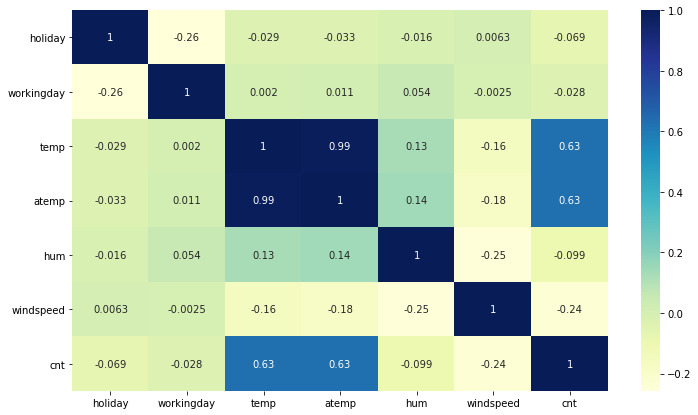

In [15]:
# Checking the correlation coefficient to observe which variables are highly corelated

plt.figure(figsize = (12, 7))
sns.heatmap(bike_data.corr(), annot = True, cmap="YlGnBu")
plt.show()

- The correlation between atemp and temp is equals to one . So we can drop one of those

In [16]:
# Dropping 'atemp'

bike_data = bike_data.drop(columns='atemp')

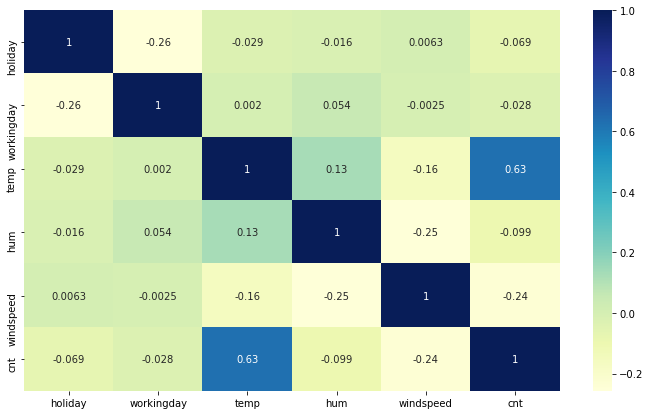

In [17]:
# Recheck the correlation coefficient after dropping the 'atemp'

plt.figure(figsize = (12, 7))
sns.heatmap(bike_data.corr(), annot = True, cmap="YlGnBu")
plt.show()

<b>Now we can proceed for data preparation for building the model

## Step 3 : Data Preparation for Model Building

<b>Creating Dummy variables</b>

In [18]:
# Let's get the dummy variables for all the categorical variables

def dummies(x,df):
    temp = pd.get_dummies(df[x], drop_first=True)
    df = pd.concat([df, temp], axis = 1)
    df.drop([x], axis = 1, inplace = True)
    return df

# Applying the above function to bike_data:

bike_data = dummies('season', bike_data)
bike_data = dummies('yr', bike_data)
bike_data = dummies('mnth', bike_data)
bike_data = dummies('weekday', bike_data)
bike_data = dummies('weathersit', bike_data)

In [19]:
bike_data.head()

,holiday,workingday,temp,hum,windspeed,cnt,spring,summer,winter,2019,...,Oct,Sep,Mon,Sat,Sun,Thu,Tue,Wed,Light Rain/Snow,Mist + Cloudy
0,0,1,14.110847,80.5833,10.749882,985,1,0,0,0,...,0,0,1,0,0,0,0,0,0,1
1,0,1,14.902598,69.6087,16.652113,801,1,0,0,0,...,0,0,0,0,0,0,1,0,0,1
2,0,1,8.050924,43.7273,16.636703,1349,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0,1,8.200000,59.0435,10.739832,1562,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,0,1,9.305237,43.6957,12.522300,1600,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [20]:
bike_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 29 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   holiday          730 non-null    int64  
 1   workingday       730 non-null    int64  
 2   temp             730 non-null    float64
 3   hum              730 non-null    float64
 4   windspeed        730 non-null    float64
 5   cnt              730 non-null    int64  
 6   spring           730 non-null    uint8  
 7   summer           730 non-null    uint8  
 8   winter           730 non-null    uint8  
 9   2019             730 non-null    uint8  
 10  Aug              730 non-null    uint8  
 11  Dec              730 non-null    uint8  
 12  Feb              730 non-null    uint8  
 13  Jan              730 non-null    uint8  
 14  July             730 non-null    uint8  
 15  June             730 non-null    uint8  
 16  Mar              730 non-null    uint8  
 17  May             

## Step 4 : Spliting the data into train and Test Set

In [21]:
from sklearn.model_selection import train_test_split

np.random.seed(0)
df_train,df_test = train_test_split(bike_data, train_size = 0.7, test_size = 0.3, random_state = 100)

In [22]:
df_train.shape

(510, 29)

In [23]:
df_test.shape

(219, 29)

#### Rescaling Features

In [24]:
from sklearn.preprocessing import MinMaxScaler

# Creating an object with the column names which needs to be scaled
num_var = ['temp','hum','windspeed','cnt']

#Performing Scaling
scaler = MinMaxScaler() 

df_train[num_var] = scaler.fit_transform(df_train[num_var])

In [25]:
df_train.head()

,holiday,workingday,temp,hum,windspeed,cnt,spring,summer,winter,2019,...,Oct,Sep,Mon,Sat,Sun,Thu,Tue,Wed,Light Rain/Snow,Mist + Cloudy
653,0,1,0.509887,0.575354,0.300794,0.864243,0,0,1,1,...,1,0,0,0,0,0,0,1,0,0
576,0,1,0.815169,0.725633,0.264686,0.827658,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
426,0,0,0.442393,0.640189,0.255342,0.465255,1,0,0,1,...,0,0,0,0,1,0,0,0,0,1
728,0,1,0.245101,0.498067,0.663106,0.204096,1,0,0,1,...,0,0,1,0,0,0,0,0,0,0
482,0,0,0.395666,0.504508,0.188475,0.482973,0,1,0,1,...,0,0,0,0,1,0,0,0,0,1


In [26]:
# Checking statistical summery of train data set

df_train.describe()

,holiday,workingday,temp,hum,windspeed,cnt,spring,summer,winter,2019,...,Oct,Sep,Mon,Sat,Sun,Thu,Tue,Wed,Light Rain/Snow,Mist + Cloudy
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.00000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.025490,0.711765,0.537262,0.650369,0.320768,0.513620,0.243137,0.245098,0.24902,0.507843,...,0.086275,0.080392,0.154902,0.129412,0.137255,0.143137,0.152941,0.135294,0.029412,0.343137
std,0.157763,0.453386,0.225844,0.145882,0.169797,0.224593,0.429398,0.430568,0.43287,0.500429,...,0.281045,0.272166,0.362166,0.335985,0.344454,0.350557,0.360284,0.342373,0.169124,0.475223
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.339853,0.538643,0.199179,0.356420,0.000000,0.000000,0.00000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,1.000000,0.540519,0.653714,0.296763,0.518638,0.000000,0.000000,0.00000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,1.000000,0.735215,0.754830,0.414447,0.684710,0.000000,0.000000,0.00000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


#### Correlation Matrix

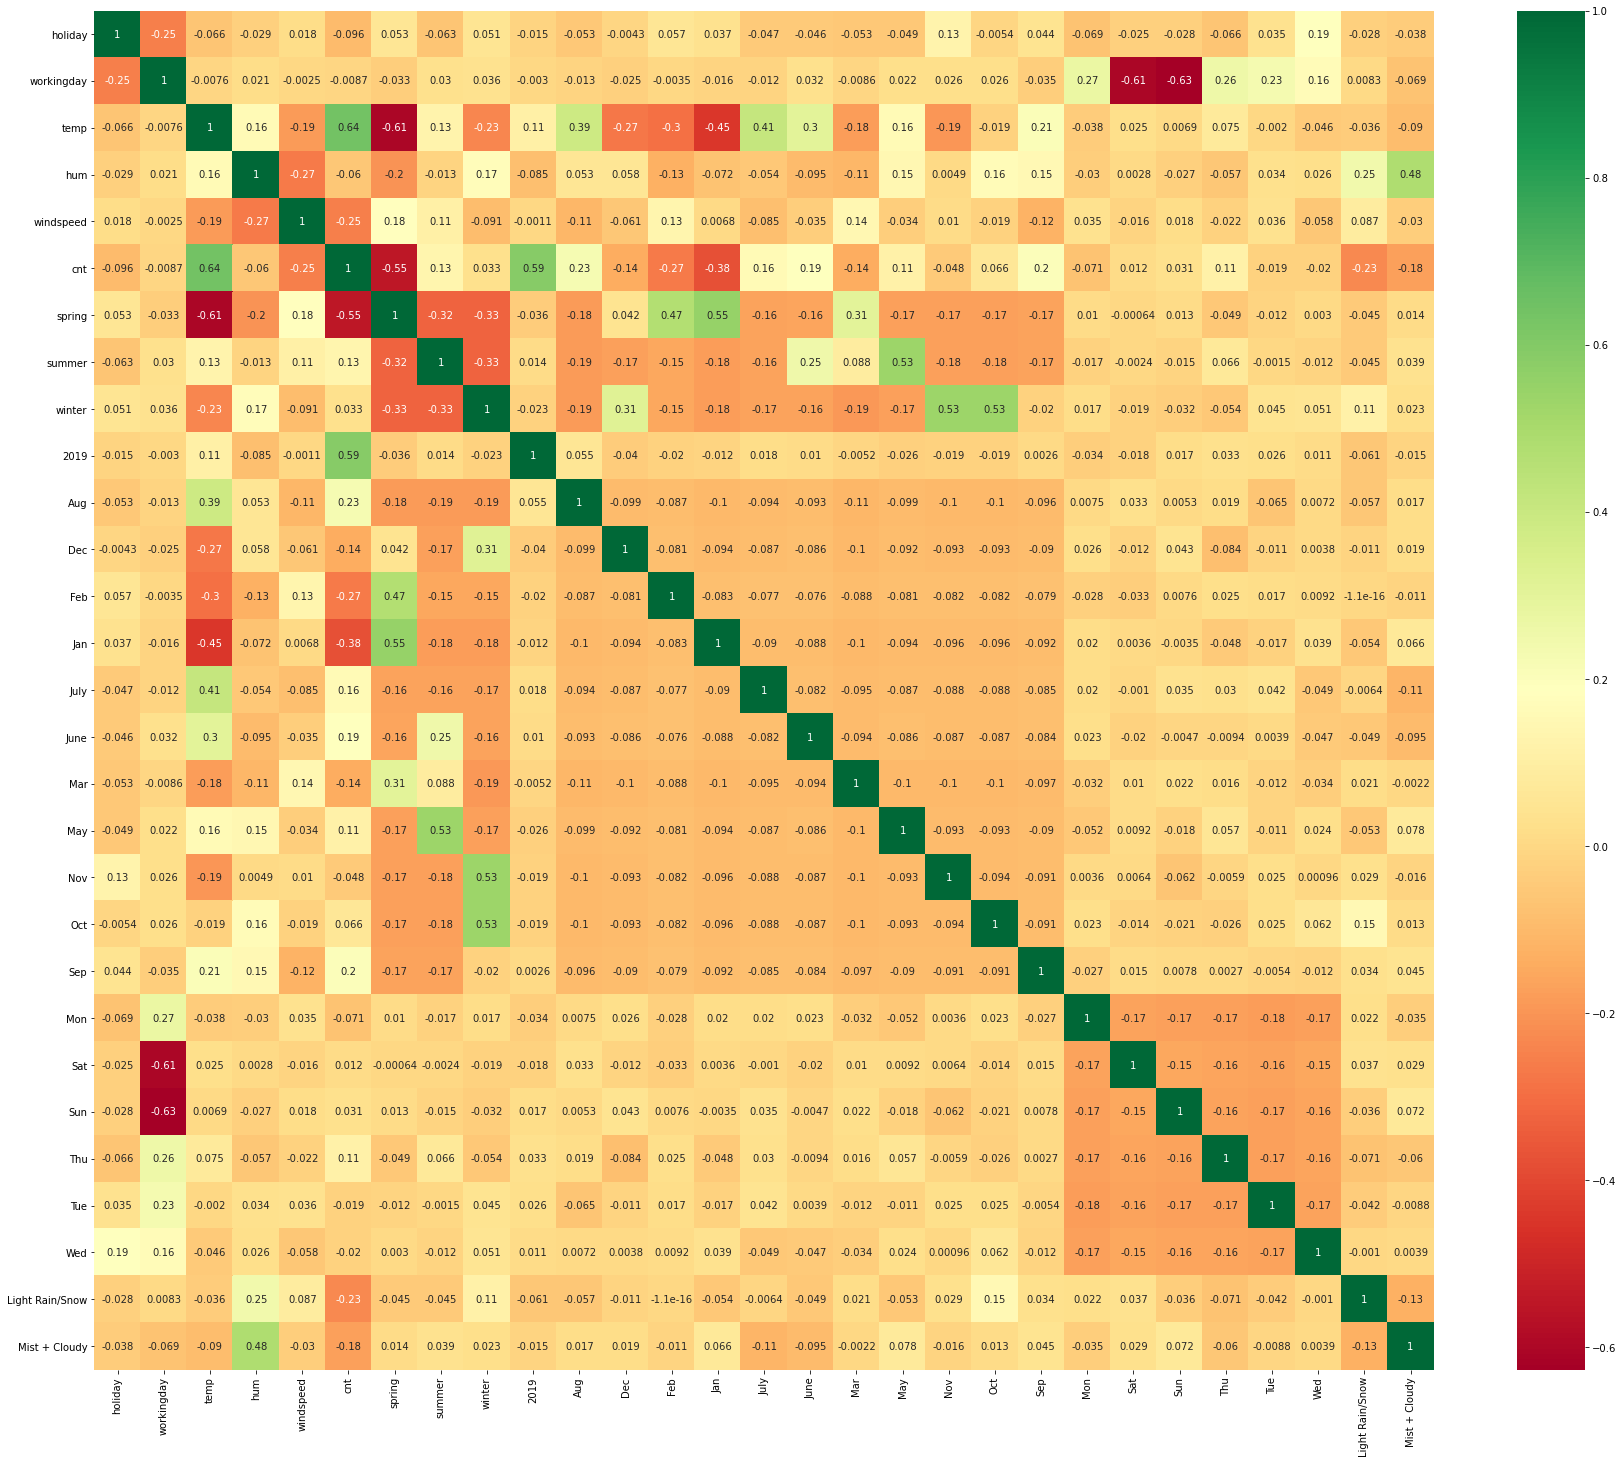

In [27]:
# Creating the correlation matrix for train data set

plt.figure(figsize = (30,25))
sns.heatmap(df_train.corr(), annot = True, cmap = 'RdYlGn')
plt.show()

- In the above heat map 'temp' looks to be most correlated with 'cnt'.

#### Deviding into X and y sets for model building

In [28]:
# Deviding data into X and y variables

y_train = df_train.pop('cnt')
X_train = df_train

In [29]:
X_train.head()

,holiday,workingday,temp,hum,windspeed,spring,summer,winter,2019,Aug,...,Oct,Sep,Mon,Sat,Sun,Thu,Tue,Wed,Light Rain/Snow,Mist + Cloudy
653,0,1,0.509887,0.575354,0.300794,0,0,1,1,0,...,1,0,0,0,0,0,0,1,0,0
576,0,1,0.815169,0.725633,0.264686,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
426,0,0,0.442393,0.640189,0.255342,1,0,0,1,0,...,0,0,0,0,1,0,0,0,0,1
728,0,1,0.245101,0.498067,0.663106,1,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0
482,0,0,0.395666,0.504508,0.188475,0,1,0,1,0,...,0,0,0,0,1,0,0,0,0,1


In [30]:
y_train.head()

653    0.864243
576    0.827658
426    0.465255
728    0.204096
482    0.482973
Name: cnt, dtype: float64

## Step 5 : Building the Model
- Mixed method is going to be followed
- 15 best features will be choosen using RFE
- Using P values and VIF we will proceed for further elemination

In [31]:
# Importing necessary libraries

from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [32]:
# Creating the fit model
lm = LinearRegression()
lm.fit(X_train, y_train)

# performing RFE
rfe = RFE(lm,15)
rfe = rfe.fit(X_train, y_train)

In [33]:
# Printing the importance of the feature variables along with their importance

list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('holiday', True, 1),
 ('workingday', False, 3),
 ('temp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('spring', True, 1),
 ('summer', True, 1),
 ('winter', True, 1),
 ('2019', True, 1),
 ('Aug', False, 9),
 ('Dec', True, 1),
 ('Feb', False, 2),
 ('Jan', True, 1),
 ('July', True, 1),
 ('June', False, 13),
 ('Mar', False, 14),
 ('May', False, 6),
 ('Nov', True, 1),
 ('Oct', False, 11),
 ('Sep', True, 1),
 ('Mon', False, 8),
 ('Sat', False, 4),
 ('Sun', False, 5),
 ('Thu', False, 12),
 ('Tue', False, 7),
 ('Wed', False, 10),
 ('Light Rain/Snow', True, 1),
 ('Mist + Cloudy', True, 1)]

In [34]:
# Columns from RFE
X_train.columns[rfe.support_]

Index(['holiday', 'temp', 'hum', 'windspeed', 'spring', 'summer', 'winter',
       '2019', 'Dec', 'Jan', 'July', 'Nov', 'Sep', 'Light Rain/Snow',
       'Mist + Cloudy'],
      dtype='object')

In [35]:
# Building model using statsmodel, for the detailed statistics

X_train_rfe = X_train[X_train.columns[rfe.support_]]
X_train_rfe.head()

,holiday,temp,hum,windspeed,spring,summer,winter,2019,Dec,Jan,July,Nov,Sep,Light Rain/Snow,Mist + Cloudy
653,0,0.509887,0.575354,0.300794,0,0,1,1,0,0,0,0,0,0,0
576,0,0.815169,0.725633,0.264686,0,0,0,1,0,0,1,0,0,0,0
426,0,0.442393,0.640189,0.255342,1,0,0,1,0,0,0,0,0,0,1
728,0,0.245101,0.498067,0.663106,1,0,0,1,1,0,0,0,0,0,0
482,0,0.395666,0.504508,0.188475,0,1,0,1,0,0,0,0,0,0,1


In [36]:
# creating a function OLS_FIT for future use
def OLS_FIT(X,y):
    X = sm.add_constant(X) #Adding the constant
    lm = sm.OLS(y,X).fit() # fitting the model
    print(lm.summary()) # model summary
    return X
    
# creating a function VIF_Model
def VIF_MODEL(X):
    X = X.drop(['const'], axis = 1)
    vif = pd.DataFrame()
    vif['Features'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return(vif)

#### Model 1

In [37]:
# Creating the model using the function created earlier
X_train_new = OLS_FIT(X_train_rfe,y_train)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     180.2
Date:                Mon, 08 Mar 2021   Prob (F-statistic):          3.34e-189
Time:                        21:39:54   Log-Likelihood:                 514.72
No. Observations:                 510   AIC:                            -997.4
Df Residuals:                     494   BIC:                            -929.7
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.3202      0.036     

In [38]:
## using the VIF function created earlier to calculate VIF
VIF_MODEL(X_train_new)

,Features,VIF
2,hum,30.94
1,temp,17.80
3,windspeed,4.72
4,spring,4.37
6,winter,4.06
5,summer,2.81
14,Mist + Cloudy,2.32
7,2019,2.09
11,Nov,1.83
9,Jan,1.75


- Dec is insignificant owing to its p-value, hence dropping it

In [39]:
# Let's dropping 'Dec'
X_train_new = X_train_rfe.drop(["Dec"], axis = 1)

#### Model 2

In [40]:
X_train_new = OLS_FIT(X_train_new,y_train)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     191.4
Date:                Mon, 08 Mar 2021   Prob (F-statistic):          2.25e-189
Time:                        21:39:54   Log-Likelihood:                 512.39
No. Observations:                 510   AIC:                            -994.8
Df Residuals:                     495   BIC:                            -931.3
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.3030      0.035     

In [41]:
## using the VIF function created earlier to calculate VIF
VIF_MODEL(X_train_new)

,Features,VIF
2,hum,29.12
1,temp,16.80
3,windspeed,4.71
4,spring,4.37
6,winter,3.78
5,summer,2.79
13,Mist + Cloudy,2.29
7,2019,2.09
8,Jan,1.67
9,July,1.59


- Jan is insignificant in presence of other variables due to high p-value; can be dropped

In [42]:
# Let's dropping 'Jan'
X_train_new = X_train_new.drop(["Jan"], axis = 1)

#### Model 3

In [43]:
X_train_new = OLS_FIT(X_train_new,y_train)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     204.7
Date:                Mon, 08 Mar 2021   Prob (F-statistic):          9.74e-190
Time:                        21:39:54   Log-Likelihood:                 510.48
No. Observations:                 510   AIC:                            -993.0
Df Residuals:                     496   BIC:                            -933.7
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.2909      0.035     

In [44]:
## using the VIF function created earlier to calculate VIF
VIF_MODEL(X_train_new)

,Features,VIF
2,hum,28.13
1,temp,16.11
3,windspeed,4.71
4,spring,4.04
6,winter,3.75
5,summer,2.78
12,Mist + Cloudy,2.29
7,2019,2.08
9,Nov,1.59
8,July,1.58


- hum can be dropped owing to high VIF value

In [45]:
# Let's dropping 'hum'
X_train_new = X_train_new.drop(["hum"], axis = 1)

#### Model 4

In [46]:
X_train_new = OLS_FIT(X_train_new,y_train)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     211.5
Date:                Mon, 08 Mar 2021   Prob (F-statistic):          1.76e-186
Time:                        21:39:55   Log-Likelihood:                 499.95
No. Observations:                 510   AIC:                            -973.9
Df Residuals:                     497   BIC:                            -918.8
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.2049      0.030     

In [47]:
## using the VIF function created earlier to calculate VIF
VIF_MODEL(X_train_new)

,Features,VIF
1,temp,5.11
2,windspeed,4.65
5,winter,2.28
4,summer,2.22
3,spring,2.09
6,2019,2.07
8,Nov,1.59
7,July,1.58
11,Mist + Cloudy,1.55
9,Sep,1.35


- Nov can be dropped owing to high P value

In [48]:
# Let's dropping 'Nov'
X_train_new = X_train_new.drop(["Nov"], axis = 1)

#### Model 5

In [49]:
X_train_new = OLS_FIT(X_train_new,y_train)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     230.4
Date:                Mon, 08 Mar 2021   Prob (F-statistic):          2.40e-187
Time:                        21:39:55   Log-Likelihood:                 499.17
No. Observations:                 510   AIC:                            -974.3
Df Residuals:                     498   BIC:                            -923.5
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.1996      0.030     

In [50]:
# using the VIF function created earlier to calculate VIF
VIF_MODEL(X_train_new)

,Features,VIF
1,temp,5.09
2,windspeed,4.60
4,summer,2.21
3,spring,2.08
6,2019,2.07
5,winter,1.79
7,July,1.58
10,Mist + Cloudy,1.55
8,Sep,1.34
9,Light Rain/Snow,1.08


- windspeed can be dropped owing to negative correlation and high VIF

In [51]:
# Let's dropping 'windspeed'
X_train_new = X_train_new.drop(["windspeed"], axis = 1)

#### Model 6

In [52]:
X_train_new = OLS_FIT(X_train_new,y_train)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.824
Model:                            OLS   Adj. R-squared:                  0.821
Method:                 Least Squares   F-statistic:                     234.1
Date:                Mon, 08 Mar 2021   Prob (F-statistic):          2.80e-181
Time:                        21:39:56   Log-Likelihood:                 481.98
No. Observations:                 510   AIC:                            -942.0
Df Residuals:                     499   BIC:                            -895.4
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.1503      0.029     

In [53]:
# using the VIF function created earlier to calculate VIF
VIF_MODEL(X_train_new)

,Features,VIF
1,temp,4.22
5,2019,2.06
3,summer,1.93
4,winter,1.58
6,July,1.58
9,Mist + Cloudy,1.55
2,spring,1.40
7,Sep,1.34
8,Light Rain/Snow,1.07
0,holiday,1.04


- summer can be dropped owing to p-value

In [54]:
# Let's dropping 'summer'
X_train_new = X_train_new.drop(["summer"], axis = 1)

#### Model 7

In [55]:
X_train_new = OLS_FIT(X_train_new,y_train)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.823
Model:                            OLS   Adj. R-squared:                  0.819
Method:                 Least Squares   F-statistic:                     257.5
Date:                Mon, 08 Mar 2021   Prob (F-statistic):          2.16e-181
Time:                        21:39:56   Log-Likelihood:                 479.38
No. Observations:                 510   AIC:                            -938.8
Df Residuals:                     500   BIC:                            -896.4
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.1938      0.022     

In [56]:
# using the VIF function created earlier to calculate VIF
VIF_MODEL(X_train_new)

,Features,VIF
1,temp,2.99
4,2019,2.05
8,Mist + Cloudy,1.51
3,winter,1.33
5,July,1.33
2,spring,1.25
6,Sep,1.19
7,Light Rain/Snow,1.06
0,holiday,1.04


- All the p-values are 0
- No significant VIF are observed. All the VIF values are less than 5.
- This model i.e. Model 7, looks good, as there seems to be VERY LOW Multicollinearity between the predictors and the p-values are 0. For now, we will consider this as our final model.

<b>Now we can proceed for Residual Analysis</b>

### Step 6 : Residual Analysis

In [57]:
lm = sm.OLS(y_train,X_train_new).fit()
y_train_pred = lm.predict(X_train_new)

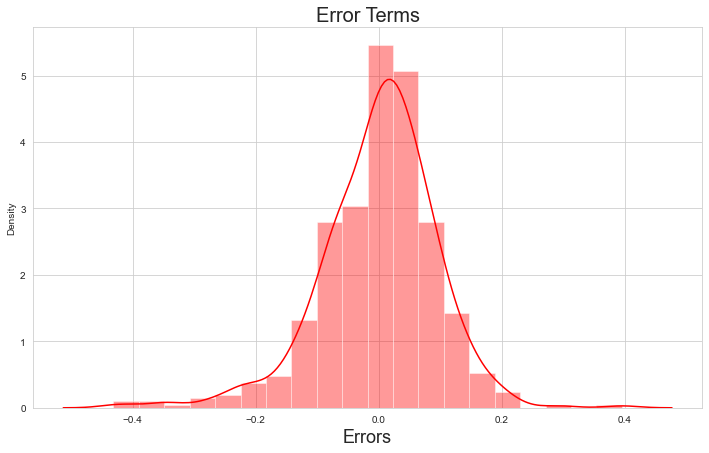

In [58]:
# Plot hte Histogram for the Error terms

plt.figure(figsize=(12,7))
sns.set_style('whitegrid')
sns.distplot((y_train - y_train_pred), bins = 20, color = 'red')
plt.title('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18) 
plt.show()

- From the above graph, we can see that error terms are distributed normally which confirms our model.

### Step 7 : Prediction and Evaluation

In [59]:
# Create a list of numeric variables

num_vars = ['temp', 'hum', 'windspeed','cnt']

# fit on data
df_test[num_vars] = scaler.transform(df_test[num_vars])
df_test.head()

,holiday,workingday,temp,hum,windspeed,cnt,spring,summer,winter,2019,...,Oct,Sep,Mon,Sat,Sun,Thu,Tue,Wed,Light Rain/Snow,Mist + Cloudy
184,1,0,0.831783,0.657364,0.084219,0.692706,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
535,0,1,0.901354,0.610133,0.153728,0.712034,0,1,0,1,...,0,0,0,0,0,1,0,0,0,0
299,0,0,0.511964,0.837699,0.334206,0.303382,0,0,1,0,...,1,0,0,1,0,0,0,0,0,1
221,0,1,0.881625,0.437098,0.339570,0.547400,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
152,0,0,0.817246,0.314298,0.537414,0.569029,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0


In [60]:
# Descriptive Statistics
df_test.describe()

,holiday,workingday,temp,hum,windspeed,cnt,spring,summer,winter,2019,...,Oct,Sep,Mon,Sat,Sun,Thu,Tue,Wed,Light Rain/Snow,Mist + Cloudy
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,...,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,0.036530,0.639269,0.558941,0.638508,0.313350,0.520592,0.255708,0.264840,0.232877,0.479452,...,0.082192,0.086758,0.118721,0.173516,0.155251,0.141553,0.123288,0.155251,0.027397,0.319635
std,0.188034,0.481313,0.233698,0.148974,0.159947,0.218435,0.437258,0.442259,0.423633,0.500722,...,0.275286,0.282125,0.324202,0.379560,0.362974,0.349389,0.329520,0.362974,0.163612,0.467403
min,0.000000,0.000000,0.046591,0.261915,-0.042808,0.048205,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.354650,0.527265,0.198517,0.377531,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,1.000000,0.558691,0.627737,0.299459,0.524275,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,1.000000,0.759096,0.743928,0.403048,0.672745,1.000000,1.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,0.984424,1.002146,0.807474,0.963300,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [61]:
#Dividing into X and y

y_test = df_test.pop('cnt')
X_test = df_test

In [62]:
# Now let's use our model to make predictions.

X_train_new = X_train_new.drop('const', axis = 1)
X_test_new = X_test[X_train_new.columns]

# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)

In [63]:
# Making Predictions

y_pred = lm.predict(X_test_new)

In [64]:
# Let's put all the coefficients in a table for easy reference:

param = pd.DataFrame(lm.params)
param.insert(0,'Variables',param.index)
param.rename(columns = {0:'Coefficient value'},inplace = True)
param['index'] = list(range(0,10))
param.set_index('index',inplace = True)
param

,Variables,Coefficient value
index,,
0,const,0.193838
1,holiday,-0.101113
2,temp,0.471172
3,spring,-0.110708
4,winter,0.055785
5,2019,0.233037
6,July,-0.068771
7,Sep,0.065793
8,Light Rain/Snow,-0.300245


In [65]:
# Evaluation of test via comparison of y_pred and y_test

from sklearn.metrics import r2_score 
rsq_test = round(r2_score(y_test, y_pred),3)
rsq_test

0.809

In [66]:
# Let's find out the Adjusted R^2 value:

# Here n is number of rows in X

n = X_test.shape[0]

# Number of features (predictors, p) is the shape along axis 1

p = X_test.shape[1]

# We find the Adjusted R-squared using the formula

rsq_adj_test = round(1-(1-rsq_test)*(n-1)/(n-p-1),3)
rsq_adj_test

0.781

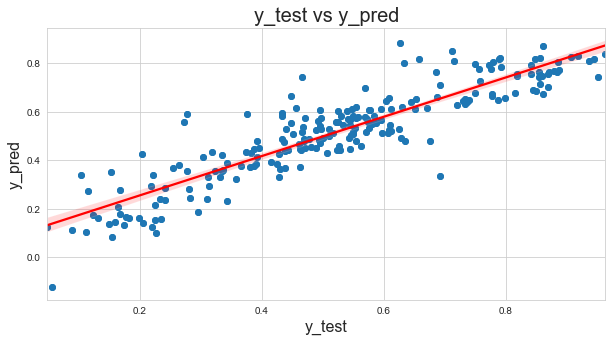

In [67]:
# Plotting y_test and y_pred for better understand the spread

plt.figure(figsize=(10,5))
plt.scatter(y_test,y_pred)
sns.regplot(x=y_test, y=y_pred, line_kws={"color": "red"})
plt.title('y_test vs y_pred', fontsize=20)               
plt.xlabel('y_test', fontsize=16)                       
plt.ylabel('y_pred', fontsize=16)                          

plt.show()

In [68]:
# Calculate the RMSE, MSE and MAE

from sklearn import metrics

print('MAE =', metrics.mean_absolute_error(y_test, y_pred))
print('MSE =', metrics.mean_squared_error(y_test, y_pred))
print('RMSE =', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE = 0.0716030199174992
MSE = 0.009061246323057638
RMSE = 0.09519057896166846


- Low value of RMSE (<0.5) suggests good ability of the model to predict. In our case, it stands at 0.095

In [69]:
# Comparing R Square and Adjusted R square from the final train and test datset

print("rsq_train         :", 0.823)
print("rsq_adj_train     :", 0.819)
print("rsq_test          :", rsq_test)
print("rsq_adj_test      :", rsq_adj_test)

rsq_train         : 0.823
rsq_adj_train     : 0.819
rsq_test          : 0.809
rsq_adj_test      : 0.781


### Conclusion:

- We have analyzed the data with Reverse Feature selection in which 15 features were selected algorithmically. Removing the variables were done manually by looking at multicollinearity and p value
- There is a very small dip in the adjusted R^2 value from training set to test set which signifies that we indeed have arrived at a best possible model which explains 78.1% of variance in the test dataset.


<b>Equation of the Final Model:

y = 0.193 - 0.101(holiday) + 0.471(temperature) - 0.110(spring) + 0.055(winter) + 0.233(2019) - 0.068(July) + 0.065(Sep) - 0.300(Light Rain/Snow) - 0.079(Mist + Cloudy)

### Business Interpretation

1. Business needs to capitalise on variables with a positive coefficient such as temperature, winter, and September. Clearly, a higher temperature is good for business, hence need to make sure availibility of bikes is ensured. Also, amongst months, September is the most promising month.

2. Business needs to minimise losses owing to variables with a negative co-efficient such as holiday, spring, month of July, and when there is light rain/snow or if the weather is Misty + Cloudy. Specific marketing content/offers can be developled to minimise losses when business slows down during these periods.

3. Given that year 2019 has a positive slope, the business should have a positive outlook since as per the model, buisness would prosper as more years go by. Also, biking could be a great way to promote intra-city travel since people might avoid public transportation and hence a new model can be promoted where people can be urged to subscribe bikes on a monthly basis where they get to retain their bike for a month which could be re-santised upon return and new bike would be given out next month. This would ensure that business has steady cash flow on a month-on-month basis.